In [1]:
import pandas as pd
df=pd.read_csv("datasets/stores.csv")

In [2]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
df.shape


(896, 5)

In [4]:
df.Store_Sales.idxmax()

649

In [5]:
df.Store_Sales.idxmin()

31

In [6]:
df.iloc[684]

Store ID                  685
Store_Area               1540
Items_Available          1820
Daily_Customer_Count      310
Store_Sales             82390
Name: 684, dtype: int64

In [7]:
df.iloc[31]

Store ID                   32
Store_Area               1250
Items_Available          1508
Daily_Customer_Count      990
Store_Sales             14920
Name: 31, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [9]:
# all the features have integer data
# check for the null data
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [10]:
#wow there is no null data
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


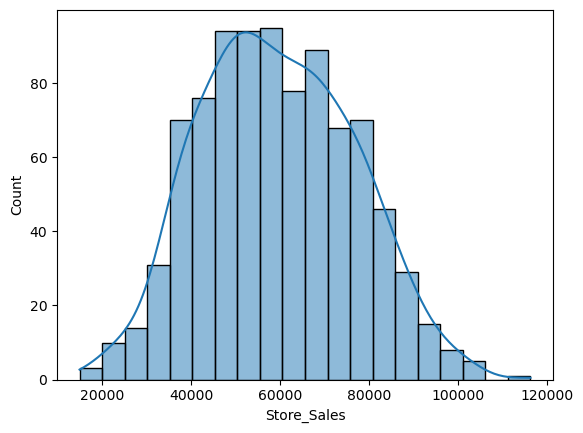

<Figure size 1200x2000 with 0 Axes>

In [11]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.histplot(df.Store_Sales, kde=True)
plt.figure(figsize=(12,20))
plt.show()


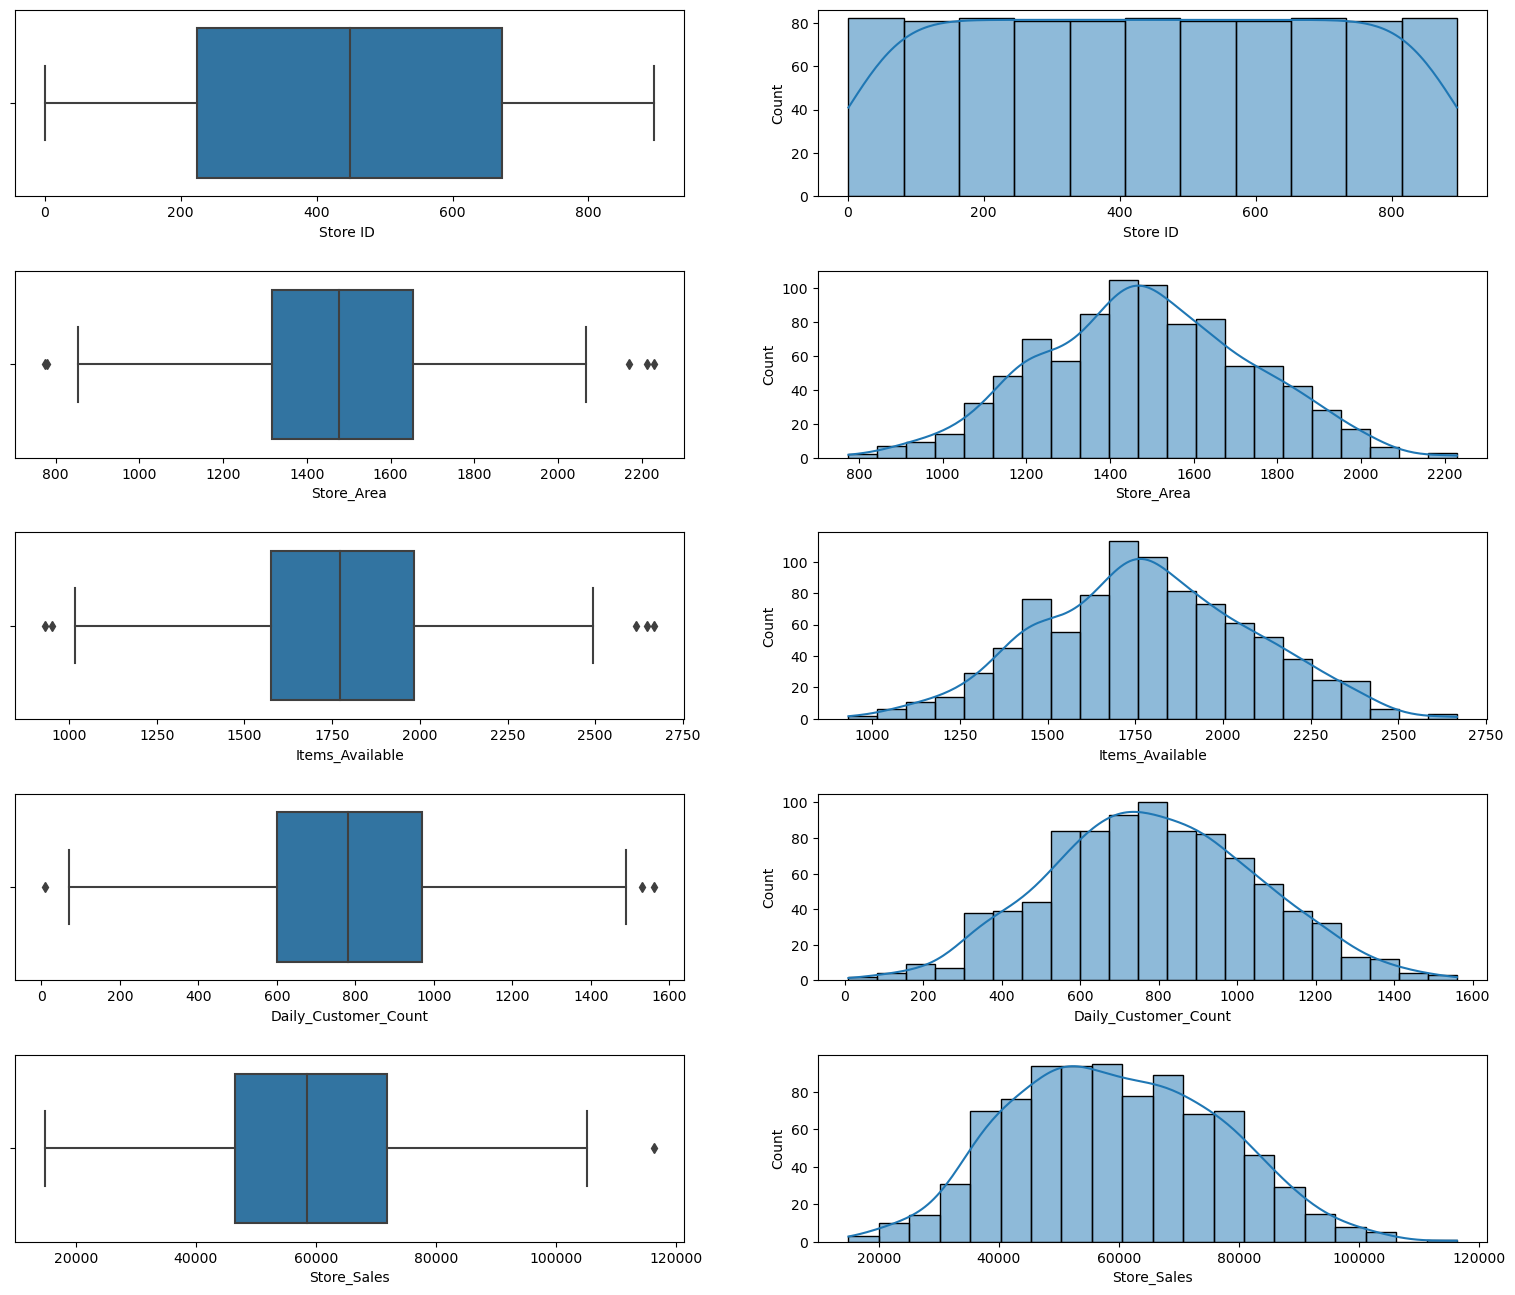

In [12]:
fig ,ax =plt.subplots(5,2, figsize=(19,16))
items=df.columns
for i, item in enumerate(items) :
    sns.boxplot(x=df[item], ax=ax[i,0])
    sns.histplot(x=df[item], ax=ax[i,1], kde=True)
    
plt.subplots_adjust(hspace=0.4)
plt.show()


In [13]:
df.columns
df_copy=df.drop('Store ID ', axis=1).copy()

In [14]:
df_copy

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


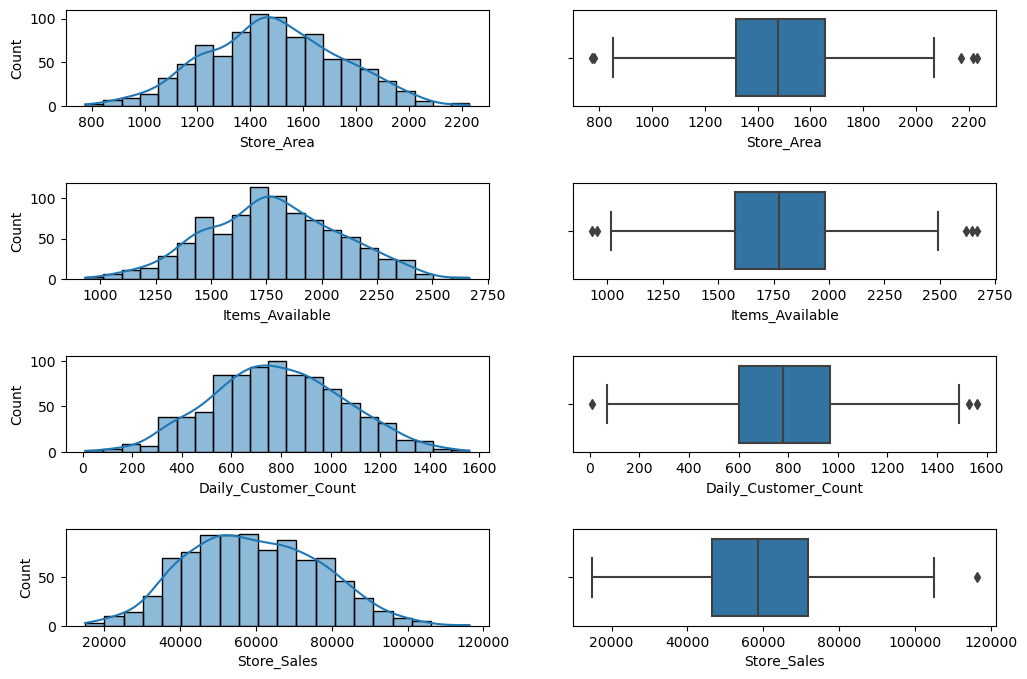

In [15]:
fig, ax=plt.subplots(4,2 , figsize=(12,8))
items=df_copy.columns
for i, item in enumerate(items):
    sns.histplot(x=df_copy[item], ax=ax[i,0], kde=True)
    sns.boxplot(x=df_copy[item], ax=ax[i,1])
    
plt.subplots_adjust(hspace=0.8)
plt.show()

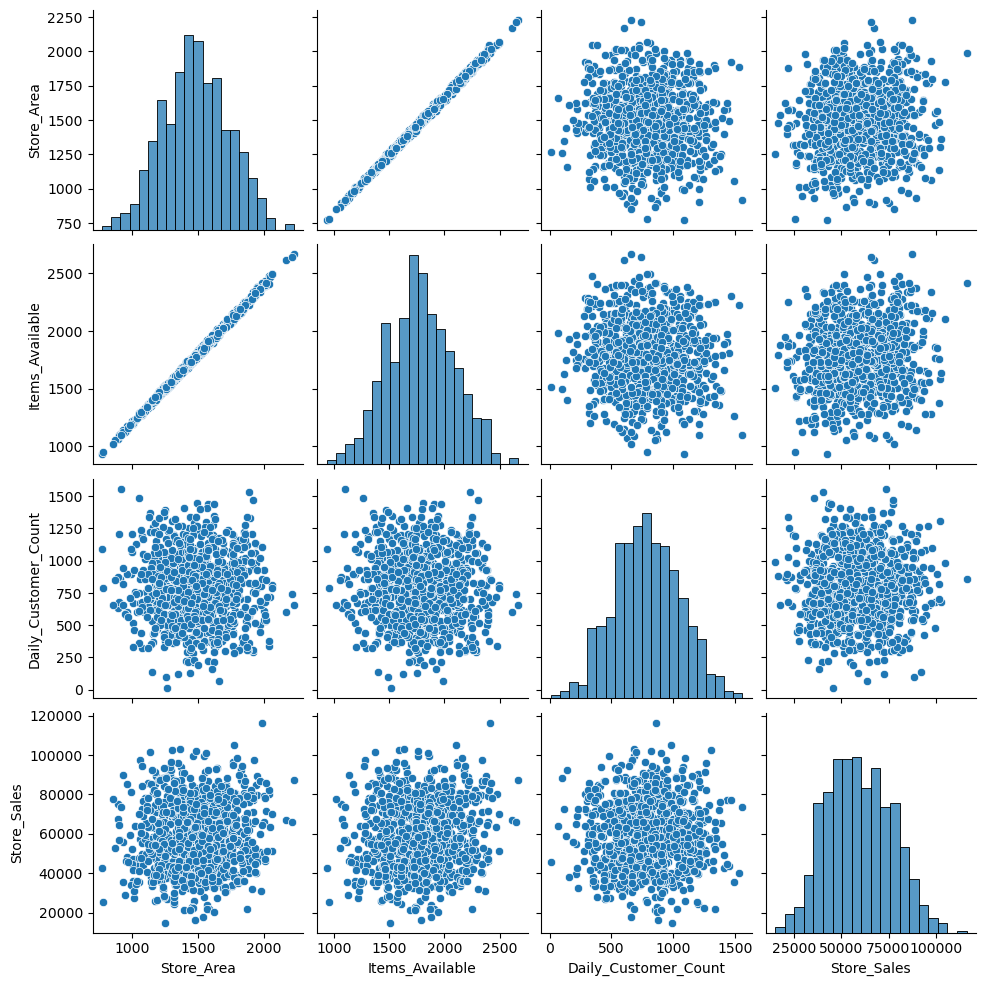

In [16]:
# given plot shows that the values are lies outside the boundries
sns.pairplot(df_copy)

In [17]:
df_copy.duplicated().sum()

0

<AxesSubplot:>

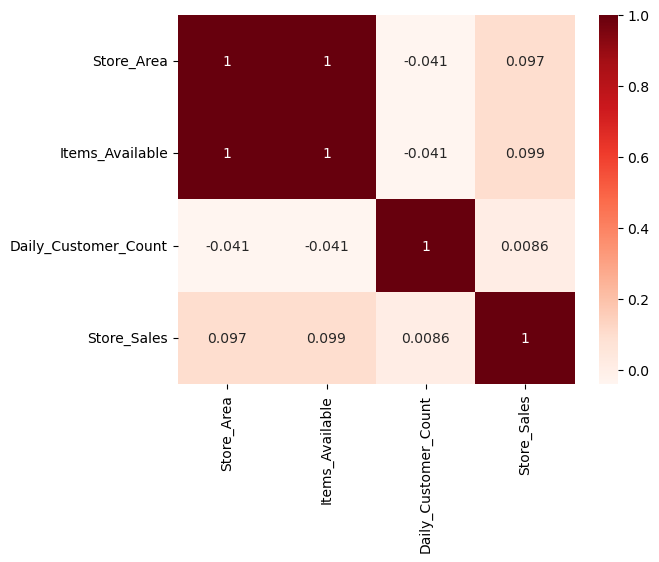

In [18]:
#it means there is no duplicate valuess
#plotting the heatmap for values
sns.heatmap(df_copy.corr(),cmap=plt.cm.Reds,annot=True)

In [19]:
#feature enginnering

df_copy.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [20]:
#the dataframe contains outliers 
#removing outliers using interquartile range(IQR)
cols=df_copy.columns
for col in cols:
    q1=df_copy[col].quantile(0.25)
    q3=df_copy[col].quantile(0.75)
    iqr=q3-q1
    #calculating lower and upper boundries
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    # to remove the outliers
    df_copy=df_copy[(df_copy[col]>lower) & (df_copy[col]<upper)]


In [21]:
df_copy

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


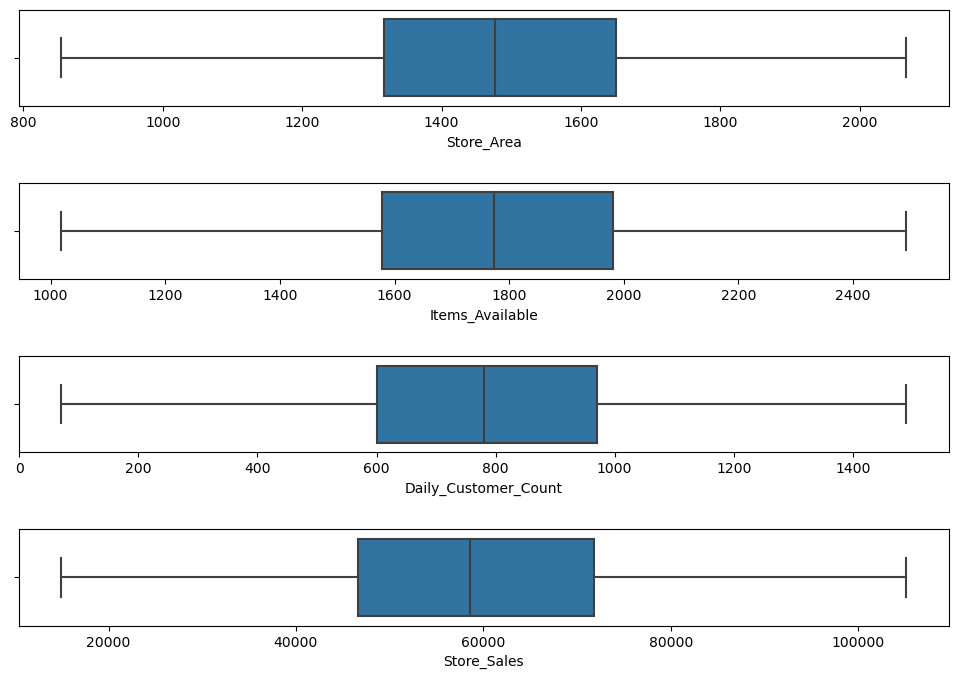

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [22]:
#checking weather the data container outlier or not by plotting
fig, ax=plt.subplots(4,1 , figsize=(12,8))

cols=df_copy.columns
for i, col in enumerate(cols):
    sns.boxplot(x=df_copy[col], ax=ax[i])

plt.subplots_adjust(hspace=0.8)
plt.show()
cols

In [23]:
# awesome !! the outliers has gone
y=df_copy.Store_Sales
X=df_copy.drop('Store_Sales', axis=1)

In [24]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, precision_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100, train_size=0.7,test_size=0.3)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(620, 3)
(267, 3)
(620,)
(267,)


In [26]:
# model
decision_reg=DecisionTreeRegressor(random_state=42)
liner_reg=LinearRegression()
random_reg=RandomForestRegressor(random_state=42)
support_reg=SVR()

models=[decision_reg, liner_reg, random_reg, support_reg]
def Model_Run(models):
    for model in models:
        model.fit(X_train,y_train)
        preds=model.predict(X_test)
        result=mean_absolute_error(preds, y_test)
        mse=mean_squared_error(preds, y_test)
        r2_s=r2_score(preds, y_test)
        print(f"{model.__class__.__name__} R2: {r2_s}")
        print(f"{model.__class__.__name__} mean_absolute_error:{result}")
        print(f"{model.__class__.__name__} mean_squred_error:{mse}")
    
Model_Run(models)

DecisionTreeRegressor R2: -1.084001454801832
DecisionTreeRegressor mean_absolute_error:19047.60299625468
DecisionTreeRegressor mean_squred_error:588419645.3183521
LinearRegression R2: -176.75482101835254
LinearRegression mean_absolute_error:14538.09389014763
LinearRegression mean_squred_error:306964689.02664423
RandomForestRegressor R2: -5.572479678775105
RandomForestRegressor mean_absolute_error:15343.823595505617
RandomForestRegressor mean_squred_error:357488882.2944944
SVR R2: -5679565.342846786
SVR mean_absolute_error:14689.304862367619
SVR mean_squred_error:313610505.00845236


In [27]:
sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.transform(X_test)


In [55]:
def Model_Run(models):
    for model in models:
        model.fit(scaled_X_train,y_train)
        preds=model.predict(scaled_X_test)
        result=mean_absolute_error(preds, y_test)
        mse=mean_squared_error( y_test,preds)
        r2_s=r2_score(y_test,preds)
        print(f"{model.__class__.__name__} R2: {r2_s}")
        print(f"{model.__class__.__name__} mean_absolute_error:{result}")
        print(f"{model.__class__.__name__} mean_squred_error:{mse}")
    
Model_Run(models)

DecisionTreeRegressor R2: -0.9387389808096214
DecisionTreeRegressor mean_absolute_error:19208.876404494382
DecisionTreeRegressor mean_squred_error:594058821.3483146
LinearRegression R2: -0.0017937398813900884
LinearRegression mean_absolute_error:14538.09389014763
LinearRegression mean_squred_error:306964689.02664423
RandomForestRegressor R2: -0.16534533099285875
RandomForestRegressor mean_absolute_error:15359.591385767788
RandomForestRegressor mean_squred_error:357079359.6486517
SVR R2: -0.023490167417260288
SVR mean_absolute_error:14689.402431497765
SVR mean_squred_error:313612801.1742866


In [29]:
#tunig the support vector regressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameter={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
gvc=GridSearchCV(support_reg, parameter, cv=5)
gvc.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']})

In [30]:
gvc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [31]:
gvc.best_score_

-0.005788607149834623

In [37]:
preds=gvc.predict(scaled_X_test)
mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
print(f" mean_absolute_error:{mae}")
print(f"mean_squred_error:{mse}")


 mean_absolute_error:14654.474030698675
mean_squred_error:312230386.1587639


In [38]:
#for decision tree
dt_param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
dt_fgrid=GridSearchCV(decision_reg, dt_param_grid, cv=5)
dt_fgrid.fit(scaled_X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10]})

In [39]:
dt_fgrid.best_params_


{'max_depth': 2, 'min_samples_leaf': 2}

In [40]:
dt_fgrid.best_score_


-0.023512445153492333

In [41]:
preds=dt_fgrid.predict(scaled_X_test)
mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
print(f" mean_absolute_error:{mae}")
print(f"mean_squred_error:{mse}")


 mean_absolute_error:15195.128717449239
mean_squred_error:336177488.88186526


In [46]:
#fro randomforest 
rt_param_grid={'n_estimators': [10, 50, 100, 200], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
model=GridSearchCV(random_reg, rt_param_grid, cv=5)
model.fit(scaled_X_train,y_train)
preds=model.predict(scaled_X_test)
mae=mean_absolute_error(preds,y_test)
print(f"mean_squred_error:{mse}")


mean_squred_error:336177488.88186526


In [48]:
# cross validation 

cv = 5
for model in models:
    scores = cross_val_score(model, scaled_X_train, y_train, cv=cv)
    print("Model: ", model.__class__.__name__)
    print("Cross-validation scores: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Model:  DecisionTreeRegressor
Cross-validation scores: -0.91 +/- 0.27
Model:  LinearRegression
Cross-validation scores: -0.00 +/- 0.01
Model:  RandomForestRegressor
Cross-validation scores: -0.13 +/- 0.06
Model:  SVR
Cross-validation scores: -0.01 +/- 0.00


In [54]:
for model in models:
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    r2 = r2_score(y_test, y_pred)
    print("Model: ", model.__class__.__name__)
    print("R-squared: {:.2f}\n".format(r2))

Model:  DecisionTreeRegressor
R-squared: -0.94

Model:  LinearRegression
R-squared: -0.00

Model:  RandomForestRegressor
R-squared: -0.17

Model:  SVR
R-squared: -0.02

